<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Data-Science/blob/main/IBMDataScienceFoodAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import sys
sys.setrecursionlimit(10000)
from tqdm import tqdm

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Geolocator: Connaught Place, Delhi, India

###Geocode

In [ ]:
address = 'Connaught Place, Delhi, India'

geolocator = Nominatim(user_agent="four_square")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 28.6313827, 77.2197924.


###Folim: Mapping Connaught Place, Delhi, India

In [ ]:
import folium

Map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'Stamen Terrain')
Map

### Folium: Mapping Connaught Place, Delhi, India with Marker

In [ ]:
Marker = folium.map.FeatureGroup()

Marker.add_child(folium.CircleMarker([latitude, longitude], 
                                             radius = 5, 
                                             color = 'red', 
                                             fill_color = 'Red'))
Map.add_child(Marker)
folium.Marker([latitude, longitude], popup = 'Connaught Place').add_to(Map)
Map

#FOURSQAURE

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##Account CREDENTIALS

In [ ]:
CLIENT_ID = 'S0JXZKOYQFOMSQX1V5SSC25DJYYQZJULBXN10YDWAKKYB405'
CLIENT_SECRET = 'KQ2ZIK51L2T3IY1AHJDSJDIRYG1L2WNVR20BCSWH55EDRBDX'
VERSION = '20180604' # Current date

##Foursquare URL

In [ ]:
LIMIT = 500
radius = 10000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=S0JXZKOYQFOMSQX1V5SSC25DJYYQZJULBXN10YDWAKKYB405&client_secret=KQ2ZIK51L2T3IY1AHJDSJDIRYG1L2WNVR20BCSWH55EDRBDX&v=20180604&ll=28.6313827,77.2197924&radius=10000&limit=500'

##Sending REQUEST 

In [ ]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5f5a94d30efb533c90dbcff8'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bc8f2c7762beee1a8bb3d38-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1fa931735',
         'name': 'Hotel',
         'pluralName': 'Hotels',
         'primary': True,
         'shortName': 'Hotel'}],
       'id': '4bc8f2c7762beee1a8bb3d38',
       'location': {'address': 'Janpath',
        'cc': 'IN',
        'city': 'New Delhi',
        'country': 'India',
        'distance': 658,
        'formattedAddress': ['Janpath', 'New Delhi 110001', 'Delhi', 'India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 28.625548038159426,
          'lng': 77.21866351780929}],
  

##DATAFRAME

In [ ]:
venues = result['response']['groups'][0]['items']
venues = json_normalize(venues)
venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.location.neighborhood,venue.venuePage.id
0,e-0-4bc8f2c7762beee1a8bb3d38-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bc8f2c7762beee1a8bb3d38,The Imperial,Janpath,28.625548,77.218664,"[{'label': 'display', 'lat': 28.62554803815942...",658,110001,IN,New Delhi,Delhi,India,"[Janpath, New Delhi 110001, Delhi, India]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN,NaN
1,e-0-54783eab498e910f8bd1781d-1,0,"[{'summary': 'This spot is popular', 'type': '...",54783eab498e910f8bd1781d,Naturals Ice Cream,L Block Outer Circle,28.634455,77.222139,"[{'label': 'display', 'lat': 28.63445530551318...",411,NaN,IN,New Delhi,Delhi,India,"[L Block Outer Circle (Connaught Place), New D...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],Connaught Place,NaN,NaN
2,e-0-4b489b54f964a520595026e3-2,0,"[{'summary': 'This spot is popular', 'type': '...",4b489b54f964a520595026e3,Connaught Place | कनॉट प्लेस (Connaught Place),Connaught Place,28.632731,77.220018,"[{'label': 'display', 'lat': 28.6327309443951,...",151,110001,IN,New Delhi,Delhi,India,"[Connaught Place (Many streets meet here), New...","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],Many streets meet here,NaN,NaN
3,e-0-4e4e44902271a1bdc3ccee8d-3,0,"[{'summary': 'This spot is popular', 'type': '...",4e4e44902271a1bdc3ccee8d,Wenger's,"A 16, Inner Circle, Connaught Place",28.633412,77.218292,"[{'label': 'display', 'lat': 28.63341189574667...",269,110001,IN,New Delhi,Delhi,India,"[A 16, Inner Circle, Connaught Place (Connaugh...","[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],Connaught Place,NaN,NaN
4,e-0-54dc85c7498ef8f9ab9b3c08-4,0,"[{'summary': 'This spot is popular', 'type': '...",54dc85c7498ef8f9ab9b3c08,Tamra,"19, Ashoka Rd",28.620543,77.218174,"[{'label': 'display', 'lat': 28.62054318423011...",1216,110001,IN,New Delhi,Delhi,India,"[19, Ashoka Rd (Windsor Pl), New Delhi 110001,...","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],Windsor Pl,NaN,NaN
5,e-0-5113713fe4b09f5a3d6a7590-5,0,"[{'summary': 'This spot is popular', 'type': '...",5113713fe4b09f5a3d6a7590,Starbucks,"A Block, Connaught Place",28.632011,77.217731,"[{'label': 'display', 'lat': 28.63201083114898...",213,NaN,IN,New Delhi,Delhi,India,"[A Block, Connaught Place (Hamilton House), Ne...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],Hamilton House,NaN,NaN
6,e-0-4c91f42fae96a0932d79a746-6,0,"[{'summary': 'This spot is popular', 'type': '...",4c91f42fae96a0932d79a746,HOTEL SARAVANA BHAVAN,"46, Janpath",28.627041,77.219514,"[{'label': 'display', 'lat': 28.62704114687105...",484,110001,IN,New Delhi,Delhi,India,"[46, Janpath (Opp. Janpath Market), New Delhi ...","[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",0,[],Opp. Janpath Market,NaN,NaN
7,e-0-569b32b5498ef7c4152b45fb-7,0,"[{'summary': 'This spot is popular', 'type': '...",569b32b5498ef7c4152b45fb,Odeon Social,"23, First Floor, Odeon Building, Radial Road 5...",28.634414,77.220936,"[{'label': 'display', 'lat': 28.63441419796370...",355,NaN,IN,New Delhi,Delhi,India,"[23, First Floor, Odeon Building, Radial Road ...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN,NaN
8,e-0-519ba450498eb0c559152d94-8,0,"[{'summary': 'This spot is popular', 'type': '...",519ba450498eb0c559152d94,HOTEL SARAVANA BHAVAN,"P-13/90, Connaught Circus",28.632319,77.216445,"[{'label': 'display', 'lat': 28.63231946643500...",343,110001,IN,New Delhi,Delhi,India,"[P-13/90, Connaught Circus, New Delhi 110001, ...","[{'id': '54135bf5e4b08f3d2429dfde', 'name': 'S...",0,[],NaN,NaN,NaN
9,e-0-4bf107ab24f020a1e0a8684f-9,0,"[{'summa

In [ ]:
data = pd.DataFrame(venues)
data.shape

(100, 22)

###Tweaking DATAFRAME

In [ ]:
data = data[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.location.city', 'venue.categories']]
data.columns = ['Name', 'Address', 'Latitude', 'Longitude', 'Distance', 'City', 'Categories']
data.head()

,Name,Address,Latitude,Longitude,Distance,City,Categories
0,The Imperial,Janpath,28.625548,77.218664,658,New Delhi,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H..."
1,Naturals Ice Cream,L Block Outer Circle,28.634455,77.222139,411,New Delhi,"[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I..."
2,Connaught Place | कनॉट प्लेस (Connaught Place),Connaught Place,28.632731,77.220018,151,New Delhi,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P..."
3,Wenger's,"A 16, Inner Circle, Connaught Place",28.633412,77.218292,269,New Delhi,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B..."
4,Tamra,"19, Ashoka Rd",28.620543,77.218174,1216,New Delhi,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R..."


In [ ]:
data['Categories'] = data['Categories'].apply(lambda x: x[0]['name'])
data.head()

,Name,Address,Latitude,Longitude,Distance,City,Categories
0,The Imperial,Janpath,28.625548,77.218664,658,New Delhi,Hotel
1,Naturals Ice Cream,L Block Outer Circle,28.634455,77.222139,411,New Delhi,Ice Cream Shop
2,Connaught Place | कनॉट प्लेस (Connaught Place),Connaught Place,28.632731,77.220018,151,New Delhi,Plaza
3,Wenger's,"A 16, Inner Circle, Connaught Place",28.633412,77.218292,269,New Delhi,Bakery
4,Tamra,"19, Ashoka Rd",28.620543,77.218174,1216,New Delhi,Restaurant


In [ ]:
data = data[['Name', 'Categories', 'Distance', 'Address', 'City', 'Latitude', 'Longitude']]
data.head(10)

,Name,Categories,Distance,Address,City,Latitude,Longitude
0,The Imperial,Hotel,658,Janpath,New Delhi,28.625548,77.218664
1,Naturals Ice Cream,Ice Cream Shop,411,L Block Outer Circle,New Delhi,28.634455,77.222139
2,Connaught Place | कनॉट प्लेस (Connaught Place),Plaza,151,Connaught Place,New Delhi,28.632731,77.220018
3,Wenger's,Bakery,269,"A 16, Inner Circle, Connaught Place",New Delhi,28.633412,77.218292
4,Tamra,Restaurant,1216,"19, Ashoka Rd",New Delhi,28.620543,77.218174
5,Starbucks,Coffee Shop,213,"A Block, Connaught Place",New Delhi,28.632011,77.217731
6,HOTEL SARAVANA BHAVAN,South Indian Restaurant,484,"46, Janpath",New Delhi,28.627041,77.219514
7,Odeon Social,Café,355,"23, First Floor, Odeon Building, Radial Road 5...",New Delhi,28.634414,77.220936
8,HOTEL SARAVANA BHAVAN,South Indian Restaurant,343,"P-13/90, Connaught Circus",New Delhi,28.632319,77.216445
9,Nizam's Kathi Kabab | निजा़म काठी कबाब,Indian Restaurant,388,"H 5 & 6, Plaza Building, Middle Circle, Connau...",New Delhi,28.634858,77.219462


###Sorting DATAFRAME

In [ ]:
data.sort_values(by = ['Distance'])

,Name,Categories,Distance,Address,City,Latitude,Longitude
29,Nando's,Portuguese Restaurant,49,"29/30 A, Malhotra Building, Block F, Inner Cir...",New Delhi,28.630947,77.219721
30,Chaayos,Café,62,F block,New Delhi,28.631629,77.220364
18,Johnny Rockets,Bistro,104,Outer Circle,New Delhi,28.630457,77.219594
2,Connaught Place | कनॉट प्लेस (Connaught Place),Plaza,151,Connaught Place,New Delhi,28.632731,77.220018
12,Rajdhani Thali,Indian Restaurant,165,"Shop No. 9A, Atmaram Mansion, Scindia House, C...",New Delhi,28.629999,77.220401
34,United Coffee House,Indian Restaurant,177,"E 15, Inner Circle, Connaught Place",New Delhi,28.632477,77.221120
17,Farzi Cafe,Molecular Gastronomy Restaurant,186,"Level 1, Block E, 38/39, Inner circle, Connaug...",New Delhi,28.632581,77.221125
11,Fabindia,Clothing Store,213,"A-1 Hamilton House, Connaught Place",New Delhi,28.632012,77.217729
5,Starbucks,Coffee Shop,213,"A Block, Connaught Place",New Delhi,28.632011,77.217731
10,Jain Chawal Wale,Food Truck,256,Shivaji Stadium,New Delhi,28.630052,77.217649


###CHECKING: Missing Value

In [ ]:
data.isna().sum()

Name           0
Categories     0
Distance       0
Address       18
City          11
Latitude       0
Longitude      0
dtype: int64

In [ ]:
data.iloc[82,:]

Name           Taj Palace Hotel
Categories                Hotel
Distance                   6255
Address       Sardar Patel Marg
City                  New Delhi
Latitude                28.5951
Longitude               77.1709
Name: 82, dtype: object

##FOLIUM: Mapping RESTAURANTS in Connaught Place, Delhi, India

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data.Latitude, data.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(data.Latitude)
longitudes = list(data.Longitude)
labels = list(data.Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Map)    
    
# add incidents to map
Map.add_child(incidents)

#ZOMATO API

>ZOMATO API

###Declaring LISTS

>Declaring LISTS

In [ ]:
Delivery = []
Takeaway = []
AverageCostof2 = []
Cuisines = []
Url = []
Image = []
Highlights = []
Address = []
Latitude = []
Longitude = []
Name = []
Type = []      
Contact = []
Timings = []
Rating = []
Review = []

###DATA Extraction from ZOMATO API

In [ ]:
headers = {'user-key': '2519d5963a6ce0e5bccf4a5f9d9e190b'}
for index, row in tqdm(data.iterrows()):
  try:
    print("Fetching data for venue: {}".format(index + 1))
    url = ('https://developers.zomato.com/api/v2.1/search?q={}&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['Name'], row['Latitude'], row['Longitude'])
    result = requests.get(url, headers = headers).json()
    Delivery.append(result['restaurants'][0]['restaurant']['R']['has_menu_status']['delivery']) #Delivery
    Takeaway.append(result['restaurants'][0]['restaurant']['R']['has_menu_status']['takeaway'])#Takeaway
    AverageCostof2.append(result['restaurants'][0]['restaurant']['average_cost_for_two']) #Average Cost of 2
    Cuisines.append(result['restaurants'][0]['restaurant']['cuisines'])
    Url.append(result['restaurants'][0]['restaurant']['events_url'])
    Image.append(result['restaurants'][0]['restaurant']['featured_image'])
    Highlights.append(result['restaurants'][0]['restaurant']['highlights'])
    Address.append(result['restaurants'][0]['restaurant']['location']['address'])
    Latitude.append(result['restaurants'][0]['restaurant']['location']['latitude'])
    Longitude.append(result['restaurants'][0]['restaurant']['location']['longitude'])
    Name.append(result['restaurants'][0]['restaurant']['name']) #Name
    Type.append(result['restaurants'][0]['restaurant']['establishment']) #Restaurant Type
    Contact.append(result['restaurants'][0]['restaurant']['phone_numbers']) #Contact
    Timings.append(result['restaurants'][0]['restaurant']['timings']) #Time
    Rating.append(result['restaurants'][0]['restaurant']['user_rating']['rating_obj']['title']['text']) #Rating
    Review.append(result['restaurants'][0]['restaurant']['user_rating']['rating_text']) #Rating
  except:
    print('Error')
    print(result)
    continue
  

0it [00:00, ?it/s]

Fetching data for venue: 1


1it [00:00,  1.76it/s]

Fetching data for venue: 2


2it [00:01,  1.89it/s]

Fetching data for venue: 3


3it [00:01,  1.67it/s]

Fetching data for venue: 4


4it [00:02,  1.35it/s]

Fetching data for venue: 5


5it [00:03,  1.46it/s]

Fetching data for venue: 6


6it [00:03,  1.62it/s]

Fetching data for venue: 7


7it [00:04,  1.62it/s]

Fetching data for venue: 8


8it [00:04,  1.75it/s]

Fetching data for venue: 9


9it [00:05,  1.90it/s]

Fetching data for venue: 10


10it [00:06,  1.69it/s]

Fetching data for venue: 11


11it [00:06,  1.50it/s]

Fetching data for venue: 12


12it [00:07,  1.63it/s]

Fetching data for venue: 13


13it [00:07,  1.72it/s]

Fetching data for venue: 14


14it [00:08,  1.80it/s]

Fetching data for venue: 15


15it [00:09,  1.54it/s]

Fetching data for venue: 16


16it [00:10,  1.41it/s]

Fetching data for venue: 17


17it [00:10,  1.48it/s]

Fetching data for venue: 18


18it [00:11,  1.52it/s]

Fetching data for venue: 19


19it [00:12,  1.33it/s]

Error
{'results_found': 0, 'results_start': 0, 'results_shown': 0, 'restaurants': []}
Fetching data for venue: 20


20it [00:12,  1.39it/s]

Fetching data for venue: 21


21it [00:13,  1.43it/s]

Fetching data for venue: 22


22it [00:14,  1.54it/s]

Fetching data for venue: 23


23it [00:14,  1.52it/s]

Fetching data for venue: 24


24it [00:15,  1.53it/s]

Fetching data for venue: 25


25it [00:15,  1.66it/s]

Error
{'results_found': 0, 'results_start': 0, 'results_shown': 0, 'restaurants': []}
Fetching data for venue: 26


26it [00:16,  1.66it/s]

Fetching data for venue: 27


27it [00:17,  1.49it/s]

Fetching data for venue: 28


28it [00:18,  1.51it/s]

Fetching data for venue: 29


29it [00:18,  1.68it/s]

Fetching data for venue: 30


30it [00:19,  1.39it/s]

Fetching data for venue: 31


31it [00:19,  1.55it/s]

Fetching data for venue: 32


32it [00:20,  1.46it/s]

Fetching data for venue: 33


33it [00:21,  1.28it/s]

Fetching data for venue: 34


34it [00:22,  1.42it/s]

Fetching data for venue: 35


35it [00:22,  1.48it/s]

Fetching data for venue: 36


36it [00:23,  1.41it/s]

Fetching data for venue: 37


37it [00:24,  1.39it/s]

Fetching data for venue: 38


38it [00:25,  1.33it/s]

Fetching data for venue: 39


39it [00:25,  1.36it/s]

Fetching data for venue: 40


40it [00:26,  1.39it/s]

Fetching data for venue: 41


41it [00:27,  1.50it/s]

Fetching data for venue: 42


42it [00:28,  1.34it/s]

Fetching data for venue: 43


43it [00:28,  1.35it/s]

Fetching data for venue: 44


44it [00:29,  1.37it/s]

Fetching data for venue: 45


45it [00:30,  1.39it/s]

Fetching data for venue: 46


46it [00:30,  1.49it/s]

Fetching data for venue: 47


47it [00:31,  1.42it/s]

Fetching data for venue: 48


48it [00:32,  1.54it/s]

Fetching data for venue: 49


49it [00:32,  1.51it/s]

Fetching data for venue: 50


50it [00:33,  1.52it/s]

Fetching data for venue: 51


51it [00:34,  1.22it/s]

Fetching data for venue: 52


52it [00:35,  1.37it/s]

Fetching data for venue: 53


53it [00:35,  1.30it/s]

Fetching data for venue: 54


54it [00:36,  1.45it/s]

Fetching data for venue: 55


55it [00:37,  1.50it/s]

Fetching data for venue: 56


56it [00:37,  1.43it/s]

Fetching data for venue: 57


57it [00:38,  1.50it/s]

Fetching data for venue: 58


58it [00:39,  1.16it/s]

Fetching data for venue: 59


59it [00:40,  1.31it/s]

Fetching data for venue: 60


60it [00:41,  1.13it/s]

Fetching data for venue: 61


61it [00:42,  1.23it/s]

Fetching data for venue: 62


62it [00:42,  1.32it/s]

Fetching data for venue: 63


63it [00:43,  1.53it/s]

Fetching data for venue: 64


64it [00:43,  1.45it/s]

Fetching data for venue: 65


65it [00:44,  1.42it/s]

Fetching data for venue: 66


66it [00:45,  1.20it/s]

Fetching data for venue: 67


67it [00:46,  1.36it/s]

Error
{'results_found': 0, 'results_start': 0, 'results_shown': 0, 'restaurants': []}
Fetching data for venue: 68


68it [00:46,  1.47it/s]

Fetching data for venue: 69


69it [00:47,  1.39it/s]

Fetching data for venue: 70


70it [00:49,  1.04it/s]

Fetching data for venue: 71


71it [00:49,  1.21it/s]

Fetching data for venue: 72


72it [00:50,  1.27it/s]

Fetching data for venue: 73


73it [00:50,  1.40it/s]

Fetching data for venue: 74


74it [00:52,  1.09it/s]

Fetching data for venue: 75


75it [00:52,  1.24it/s]

Fetching data for venue: 76


76it [00:53,  1.40it/s]

Fetching data for venue: 77


77it [00:54,  1.42it/s]

Fetching data for venue: 78


78it [00:54,  1.57it/s]

Fetching data for venue: 79


79it [00:55,  1.57it/s]

Fetching data for venue: 80


80it [00:55,  1.63it/s]

Fetching data for venue: 81


81it [00:56,  1.67it/s]

Fetching data for venue: 82


82it [00:56,  1.74it/s]

Fetching data for venue: 83


83it [00:57,  1.80it/s]

Fetching data for venue: 84


84it [00:57,  1.71it/s]

Fetching data for venue: 85


85it [00:58,  1.54it/s]

Fetching data for venue: 86


86it [00:59,  1.46it/s]

Fetching data for venue: 87


87it [01:00,  1.55it/s]

Fetching data for venue: 88


88it [01:00,  1.53it/s]

Fetching data for venue: 89


89it [01:01,  1.41it/s]

Fetching data for venue: 90


90it [01:02,  1.38it/s]

Fetching data for venue: 91


91it [01:02,  1.50it/s]

Fetching data for venue: 92


92it [01:03,  1.35it/s]

Fetching data for venue: 93


93it [01:04,  1.47it/s]

Fetching data for venue: 94


94it [01:04,  1.57it/s]

Fetching data for venue: 95


95it [01:05,  1.61it/s]

Fetching data for venue: 96


96it [01:06,  1.57it/s]

Fetching data for venue: 97


97it [01:07,  1.34it/s]

Fetching data for venue: 98


98it [01:07,  1.44it/s]

Fetching data for venue: 99


99it [01:08,  1.48it/s]

Fetching data for venue: 100


100it [01:08,  1.45it/s]


In [ ]:
"""result['restaurants'][0]['restaurant']['R']['has_menu_status']['delivery'])#Delivery
result['restaurants'][0]['restaurant']['R']['has_menu_status']['takeaway']) #Takeaway
result['restaurants'][0]['restaurant']['average_cost_for_two'] #Average Cost of 2
result['restaurants'][0]['restaurant']['cuisines']
result['restaurants'][0]['restaurant']['events_url']
result['restaurants'][0]['restaurant']['featured_image']
result['restaurants'][0]['restaurant']['highlights']
result['restaurants'][0]['restaurant']['location']['address']
result['restaurants'][0]['restaurant']['location']['latitude']
result['restaurants'][0]['restaurant']['location']['longitude']
result['restaurants'][0]['restaurant']['name'] #Name
result['restaurants'][0]['restaurant']['establishment'] #Restaurant Type
result['restaurants'][0]['restaurant']['phone_numbers'] #Contact
result['restaurants'][0]['restaurant']['timings'] #Time
result['restaurants'][0]['restaurant']['user_rating']['rating_obj']['title']['text'] #Rating
result['restaurants'][0]['restaurant']['user_rating']['rating_text'] #Rating"""

"result['restaurants'][0]['restaurant']['R']['has_menu_status']['delivery'])#Delivery\nresult['restaurants'][0]['restaurant']['R']['has_menu_status']['takeaway']) #Takeaway\nresult['restaurants'][0]['restaurant']['average_cost_for_two'] #Average Cost of 2\nresult['restaurants'][0]['restaurant']['cuisines']\nresult['restaurants'][0]['restaurant']['events_url']\nresult['restaurants'][0]['restaurant']['featured_image']\nresult['restaurants'][0]['restaurant']['highlights']\nresult['restaurants'][0]['restaurant']['location']['address']\nresult['restaurants'][0]['restaurant']['location']['latitude']\nresult['restaurants'][0]['restaurant']['location']['longitude']\nresult['restaurants'][0]['restaurant']['name'] #Name\nresult['restaurants'][0]['restaurant']['establishment'] #Restaurant Type\nresult['restaurants'][0]['restaurant']['phone_numbers'] #Contact\nresult['restaurants'][0]['restaurant']['timings'] #Time\nresult['restaurants'][0]['restaurant']['user_rating']['rating_obj']['title']['text

>DATA Extraction from ZOMATO API

###Creating RESTAURANTS DataFrame

In [ ]:
RESTAURANTS = pd.DataFrame({'Delivery':Delivery,
'Takeaway':Takeaway,
'Average Cost of 2':AverageCostof2,
'Cousines':Cuisines,
'URL':Url,
'Image':Image,
#'Highlights':Highlights,
'Address':Address,
'Latitude':Latitude,
'Longitude':Longitude,
'Name':Name,
'Type':Type,      
'Contact':Contact,
'Timings':Timings,
'Rating':Rating,
'Review':Review})

>Creating RESTAURANTS DataFrame

###Data Pre-Processing

>Data Pre-Processing

In [ ]:
RESTAURANTS = RESTAURANTS[['Name', 'Type', 'Rating', 'Review', 'Timings', 'Cousines', 'Average Cost of 2','Address', 'Latitude', 'Longitude', 'Image', 'URL', 'Delivery', 'Takeaway', 'Contact']]
RESTAURANTS['Type'] = RESTAURANTS['Type'].apply(lambda x: ''.join(x))
RESTAURANTS = RESTAURANTS[RESTAURANTS['Rating'] != '-']
RESTAURANTS = RESTAURANTS.drop([8, 24, 75]) #63
RESTAURANTS.head()

,Name,Type,Rating,Review,Timings,Cousines,Average Cost of 2,Address,Latitude,Longitude,Image,URL,Delivery,Takeaway,Contact
0,Nostalgia at 1911 Brasserie - The Imperial,Fine Dining,3.5,Good,6:30 PM to 11:45 PM,"European, Continental",6000,"The Imperial, Janpath, New Delhi",28.6250329807,77.2190765664,,https://www.zomato.com/ncr/nostalgia-at-1911-b...,-1,-1,"011 41116602, 011 41116603"
1,Natural Ice Cream,Dessert Parlour,4.7,Excellent,9am – 1am (Mon-Sun),"Desserts, Ice Cream",350,"L-8, L Block, Outer Circle, Connaught Place, N...",28.6344491660,77.2220343724,https://b.zmtcdn.com/data/pictures/8/313368/da...,https://www.zomato.com/NaturalsCP/events#tabto...,-1,-1,"011 43785502, +91 8368436163"
2,Cafe Coffee Day,Café,2.6,Average,8 AM to 11 PM,"Cafe, Fast Food, Desserts, Beverages, Sandwich",500,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",28.6329745678,77.2197072208,https://b.zmtcdn.com/data/pictures/chains/3/59...,https://www.zomato.com/ncr/cafe-coffee-day-15-...,-1,-1,+91 9999344535
3,Peshawari Dhaba,,3.9,Good,"12 Noon to 4 PM, 6 PM to 8 PM",North Indian,150,"S-5, Palika Bazar, Connaught Place, New Delhi",28.6307183424,77.2172660753,,https://www.zomato.com/ncr/peshawari-dhaba-con...,-1,-1,011 66724302
4,Tamra - Shangri-La's - Eros Hotel,Fine Dining,4.5,Excellent,7 AM to 12 Midnight,"North Indian, Continental, European, Asian, Am...",3800,"Shangri-La's - Eros Hotel, 19, Level 1, Ashoka...",28.6211052250,77.2169569507,https://b.zmtcdn.com/data/pictures/9/311369/1d...,https://www.zomato.com/ncr/tamra-shangri-las-e...,-1,-1,"011 41191010, 011 41191011, +91 9599787836"


In [ ]:
RESTAURANTS.groupby('Type').count()

,Name,Rating,Review,Timings,Cousines,Average Cost of 2,Address,Latitude,Longitude,Image,URL,Delivery,Takeaway,Contact
Type,,,,,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Bakery,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bar,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Café,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Casual Dining,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Club,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Dessert Parlour,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Fine Dining,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Lounge,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
print('There are {} uniques categories.'.format(len(RESTAURANTS['Type'].unique())))

There are 12 uniques categories.


In [ ]:
# one hot encoding
RESTAURANTS_onehot = pd.get_dummies(RESTAURANTS[['Type']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
RESTAURANTS_onehot['Name'] = RESTAURANTS['Name'] 

# move neighborhood column to the first column
fixed_columns = [RESTAURANTS_onehot.columns[-1]] + list(RESTAURANTS_onehot.columns[:-1])
RESTAURANTS_onehot = RESTAURANTS_onehot[fixed_columns]

RESTAURANTS_onehot

,Name,,Bakery,Bar,Café,Casual Dining,Club,Dessert Parlour,Fine Dining,Lounge,Paan Shop,Quick Bites,Sweet Shop
0,Nostalgia at 1911 Brasserie - The Imperial,0,0,0,0,0,0,0,1,0,0,0,0
1,Natural Ice Cream,0,0,0,0,0,0,1,0,0,0,0,0
2,Cafe Coffee Day,0,0,0,1,0,0,0,0,0,0,0,0
3,Peshawari Dhaba,1,0,0,0,0,0,0,0,0,0,0,0
4,Tamra - Shangri-La's - Eros Hotel,0,0,0,0,0,0,0,1,0,0,0,0
5,Starbucks Coffee,0,0,0,1,0,0,0,0,0,0,0,0
6,Saravana Bhavan,0,0,0,0,1,0,0,0,0,0,0,0
7,Odeon Gupta Paan Palace,0,0,0,0,0,0,0,0,0,1,0,0
9,Nizam's Kathi Kabab,0,0,0,0,1,0,0,0,0,0,0,0
11,Fabcafe By Fabindia,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
RESTAURANTS_onehot.shape

(84, 13)

In [ ]:
RESTAURANTS_grouped = RESTAURANTS_onehot.groupby('Name').mean().reset_index()
RESTAURANTS_grouped

,Name,,Bakery,Bar,Café,Casual Dining,Club,Dessert Parlour,Fine Dining,Lounge,Paan Shop,Quick Bites,Sweet Shop
0,Amar Biscuit Bakery,0,1,0,0,0,0,0,0,0,0,0,0
1,Amour Bistro,0,0,0,0,1,0,0,0,0,0,0,0
2,Apni Dukan,0,0,0,0,0,0,0,0,0,0,1,0
3,Aqua - The Park,0,0,0,0,0,0,0,0,1,0,0,0
4,Authentique Bites,0,1,0,0,0,0,0,0,0,0,0,0
5,Baba's Beans Coffee Bar - Taj Vivanta,0,0,0,1,0,0,0,0,0,0,0,0
6,Bengali Sweets And Snacks,0,0,0,0,0,0,0,0,0,0,0,1
7,Bikanervala,0,0,0,0,0,0,0,0,0,0,0,1
8,Cafe Coffee Day,0,0,0,1,0,0,0,0,0,0,0,0
9,Cafe Lota,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
RESTAURANTS_grouped.shape

(73, 13)

##GROUPING DATA

>GROUPING DATA

###Area wise GROUPING Data

>Area wise GROUPING Data

In [ ]:
num_top_venues = 10

for hood in RESTAURANTS_grouped['Name']:
    print("----"+hood+"----")
    temp = RESTAURANTS_grouped[RESTAURANTS_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amar Biscuit Bakery----
             venue  freq
0           Bakery   1.0
1                    0.0
2              Bar   0.0
3             Café   0.0
4    Casual Dining   0.0
5             Club   0.0
6  Dessert Parlour   0.0
7      Fine Dining   0.0
8           Lounge   0.0
9        Paan Shop   0.0


----Amour Bistro----
             venue  freq
0    Casual Dining   1.0
1                    0.0
2           Bakery   0.0
3              Bar   0.0
4             Café   0.0
5             Club   0.0
6  Dessert Parlour   0.0
7      Fine Dining   0.0
8           Lounge   0.0
9        Paan Shop   0.0


----Apni Dukan----
             venue  freq
0      Quick Bites   1.0
1                    0.0
2           Bakery   0.0
3              Bar   0.0
4             Café   0.0
5    Casual Dining   0.0
6             Club   0.0
7  Dessert Parlour   0.0
8      Fine Dining   0.0
9           Lounge   0.0


----Aqua - The Park----
             venue  freq
0           Lounge   1.0
1                    0.0
2 

> FUNCTION: Returning popular venues

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

###TOP Common Venues

>TOP Common Venues

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
RESTAURANTS_venues_sorted = pd.DataFrame(columns=columns)
RESTAURANTS_venues_sorted['Name'] = RESTAURANTS_grouped['Name']

for ind in np.arange(RESTAURANTS_grouped.shape[0]):
    RESTAURANTS_venues_sorted.iloc[ind, 1:] = return_most_common_venues(RESTAURANTS_grouped.iloc[ind, :], num_top_venues)

RESTAURANTS_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amar Biscuit Bakery,Bakery,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Café
1,Amour Bistro,Casual Dining,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Café,Bar
2,Apni Dukan,Quick Bites,Sweet Shop,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Café,Bar
3,Aqua - The Park,Lounge,Sweet Shop,Quick Bites,Paan Shop,Fine Dining,Dessert Parlour,Club,Casual Dining,Café,Bar
4,Authentique Bites,Bakery,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Café


##Clustering RESTAURANTS

> Run *k*-means to cluster the restaurants into 5 clusters.

In [ ]:
# set number of clusters
kclusters = 5

RESTAURANTS_grouped_clustering = RESTAURANTS_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(RESTAURANTS_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 0, 0, 2, 0, 0, 2, 2], dtype=int32)

> Let's create a new dataframe that includes the cluster as well as the top 10 venues for each restaurants.

In [ ]:
# add clustering labels
RESTAURANTS_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

RESTAURANTS_merged = RESTAURANTS
#RESTAURANTS_merged.drop(['Timing', 'Cosuines', 'Image', 'URL', 'Delivery', 'Takeaway'], axis = 1, inplace = True)
# merge RESTAURANTS_grouped with RESTAURANTS_data to add latitude/longitude for each neighborhood
RESTAURANTS_merged = RESTAURANTS_merged.join(RESTAURANTS_venues_sorted.set_index('Name'), on='Name')

RESTAURANTS_merged.head() # check the last columns!

,Name,Type,Rating,Review,Timings,Cousines,Average Cost of 2,Address,Latitude,Longitude,Image,URL,Delivery,Takeaway,Contact,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Nostalgia at 1911 Brasserie - The Imperial,Fine Dining,3.5,Good,6:30 PM to 11:45 PM,"European, Continental",6000,"The Imperial, Janpath, New Delhi",28.6250329807,77.2190765664,,https://www.zomato.com/ncr/nostalgia-at-1911-b...,-1,-1,"011 41116602, 011 41116603",4,Fine Dining,Sweet Shop,Quick Bites,Paan Shop,Lounge,Dessert Parlour,Club,Casual Dining,Café,Bar
1,Natural Ice Cream,Dessert Parlour,4.7,Excellent,9am – 1am (Mon-Sun),"Desserts, Ice Cream",350,"L-8, L Block, Outer Circle, Connaught Place, N...",28.6344491660,77.2220343724,https://b.zmtcdn.com/data/pictures/8/313368/da...,https://www.zomato.com/NaturalsCP/events#tabto...,-1,-1,"011 43785502, +91 8368436163",0,Dessert Parlour,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Club,Casual Dining,Café,Bar
2,Cafe Coffee Day,Café,2.6,Average,8 AM to 11 PM,"Cafe, Fast Food, Desserts, Beverages, Sandwich",500,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",28.6329745678,77.2197072208,https://b.zmtcdn.com/data/pictures/chains/3/59...,https://www.zomato.com/ncr/cafe-coffee-day-15-...,-1,-1,+91 9999344535,2,Café,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Bar
3,Peshawari Dhaba,,3.9,Good,"12 Noon to 4 PM, 6 PM to 8 PM",North Indian,150,"S-5, Palika Bazar, Connaught Place, New Delhi",28.6307183424,77.2172660753,,https://www.zomato.com/ncr/peshawari-dhaba-con...,-1,-1,011 66724302,0,,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Café
4,Tamra - Shangri-La's - Eros Hotel,Fine Dining,4.5,Excellent,7 AM to 12 Midnight,"North Indian, Continental, European, Asian, Am...",3800,"Shangri-La's - Eros Hotel, 19, Level 1, Ashoka...",28.6211052250,77.2169569507,https://b.zmtcdn.com/data/pictures/9/311369/1d...,https://www.zomato.com/ncr/tamra-shangri-las-e...,-1,-1,"011 41191010, 011 41191011, +91 9599787836",4,Fine Dining,Sweet Shop,Quick Bites,Paan Shop,Lounge,Dessert Parlour,Club,Casual Dining,Café,Bar


In [ ]:
#RESTAURANTS_merged = RESTAURANTS_merged.drop(16)
#RESTAURANTS_merged

In [ ]:
RESTAURANTS_merged['Cluster Labels'] = RESTAURANTS_merged['Cluster Labels'].astype(int)
RESTAURANTS_merged.head()

,Name,Type,Rating,Review,Timings,Cousines,Average Cost of 2,Address,Latitude,Longitude,Image,URL,Delivery,Takeaway,Contact,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Nostalgia at 1911 Brasserie - The Imperial,Fine Dining,3.5,Good,6:30 PM to 11:45 PM,"European, Continental",6000,"The Imperial, Janpath, New Delhi",28.6250329807,77.2190765664,,https://www.zomato.com/ncr/nostalgia-at-1911-b...,-1,-1,"011 41116602, 011 41116603",4,Fine Dining,Sweet Shop,Quick Bites,Paan Shop,Lounge,Dessert Parlour,Club,Casual Dining,Café,Bar
1,Natural Ice Cream,Dessert Parlour,4.7,Excellent,9am – 1am (Mon-Sun),"Desserts, Ice Cream",350,"L-8, L Block, Outer Circle, Connaught Place, N...",28.6344491660,77.2220343724,https://b.zmtcdn.com/data/pictures/8/313368/da...,https://www.zomato.com/NaturalsCP/events#tabto...,-1,-1,"011 43785502, +91 8368436163",0,Dessert Parlour,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Club,Casual Dining,Café,Bar
2,Cafe Coffee Day,Café,2.6,Average,8 AM to 11 PM,"Cafe, Fast Food, Desserts, Beverages, Sandwich",500,"Gate 7, Rajiv Chowk Metro Station, Connaught P...",28.6329745678,77.2197072208,https://b.zmtcdn.com/data/pictures/chains/3/59...,https://www.zomato.com/ncr/cafe-coffee-day-15-...,-1,-1,+91 9999344535,2,Café,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Bar
3,Peshawari Dhaba,,3.9,Good,"12 Noon to 4 PM, 6 PM to 8 PM",North Indian,150,"S-5, Palika Bazar, Connaught Place, New Delhi",28.6307183424,77.2172660753,,https://www.zomato.com/ncr/peshawari-dhaba-con...,-1,-1,011 66724302,0,,Sweet Shop,Quick Bites,Paan Shop,Lounge,Fine Dining,Dessert Parlour,Club,Casual Dining,Café
4,Tamra - Shangri-La's - Eros Hotel,Fine Dining,4.5,Excellent,7 AM to 12 Midnight,"North Indian, Continental, European, Asian, Am...",3800,"Shangri-La's - Eros Hotel, 19, Level 1, Ashoka...",28.6211052250,77.2169569507,https://b.zmtcdn.com/data/pictures/9/311369/1d...,https://www.zomato.com/ncr/tamra-shangri-las-e...,-1,-1,"011 41191010, 011 41191011, +91 9599787836",4,Fine Dining,Sweet Shop,Quick Bites,Paan Shop,Lounge,Dessert Parlour,Club,Casual Dining,Café,Bar


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

> Finally, let's visualize the resulting clusters

In [ ]:
"""# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(RESTAURANTS_merged['Latitude'], RESTAURANTS_merged['Longitude'], RESTAURANTS_merged['Name'], RESTAURANTS_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters"""

"# create map\nmap_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)\n\n# set color scheme for the clusters\nx = np.arange(kclusters)\nys = [i + x + (i*x)**2 for i in range(kclusters)]\ncolors_array = cm.rainbow(np.linspace(0, 1, len(ys)))\nrainbow = [colors.rgb2hex(i) for i in colors_array]\n\n# add markers to the map\nmarkers_colors = []\nfor lat, lon, poi, cluster in zip(RESTAURANTS_merged['Latitude'], RESTAURANTS_merged['Longitude'], RESTAURANTS_merged['Name'], RESTAURANTS_merged['Cluster Labels']):\n    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)\n    folium.CircleMarker(\n        [lat, lon],\n        radius=5,\n        popup=label,\n        color=rainbow[cluster-1],\n        fill=True,\n        fill_color=rainbow[cluster-1],\n        fill_opacity=0.7).add_to(map_clusters)\n       \nmap_clusters"

In [ ]:
#RESTAURANTS['Type'].value_counts().plot.bar()

###BARGraph: Plotting the count of TYPE of RESTAURANTS

>BARGraph: Plotting the count of TYPE of RESTAURANTS

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

<BarContainer object of 12 artists>

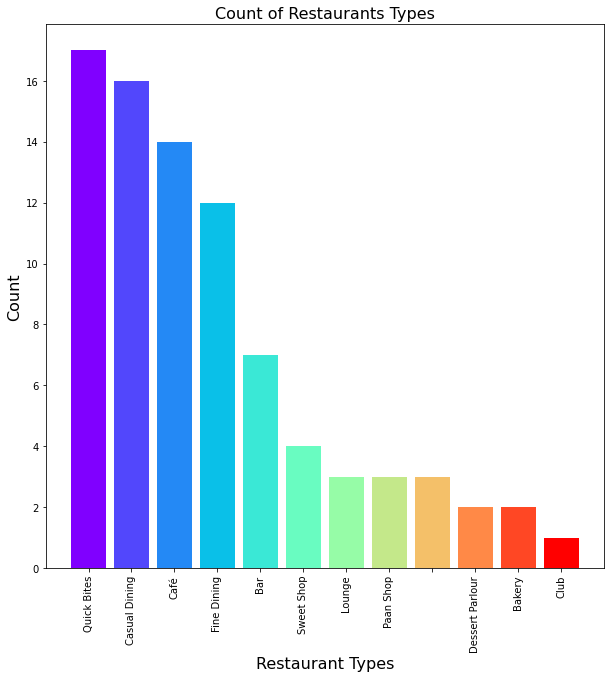

In [ ]:
Distribution = RESTAURANTS['Type'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(Distribution.index)))
plt.figure(figsize = (10, 10))
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Types", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of Restaurants Types", fontsize = 16)
plt.bar(Distribution.index, Distribution.values, color = colors)

###OVERLAPPING BARGraph: Plotting the RATING of RESTAURANTS

>OVERLAPPING BARGraph: Plotting the RATING of RESTAURANTS

Text(0.5, 1.0, 'Count of venues with given rating')

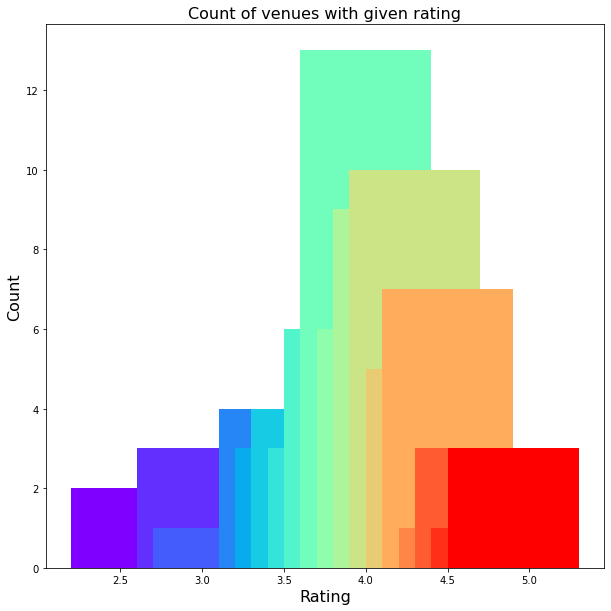

In [ ]:
RESTAURANTS['Rating'] = RESTAURANTS['Rating'].astype(float)
rating = RESTAURANTS['Rating'].value_counts().sort_index()
plt.figure(figsize = (10, 10))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

>SETTING Recursion LIMIT

In [ ]:
sys.setrecursionlimit(15000)

###FOLIUM: Mapping

>FOLIUM: Mapping

In [ ]:
"""Map = folium.Map(location = [latitude, longitude], zoom_start = 10, tiles = 'Stamen Terrain')

Marker = folium.map.FeatureGroup()

Marker.add_child(folium.CircleMarker([latitude, longitude], 
                                             radius = 5, 
                                             color = 'red', 
                                             fill_color = 'Red'))
Map.add_child(Marker)
folium.Marker([latitude, longitude], popup = 'Connaught Place').add_to(Map)
Map"""

"Map = folium.Map(location = [latitude, longitude], zoom_start = 10, tiles = 'Stamen Terrain')\n\nMarker = folium.map.FeatureGroup()\n\nMarker.add_child(folium.CircleMarker([latitude, longitude], \n                                             radius = 5, \n                                             color = 'red', \n                                             fill_color = 'Red'))\nMap.add_child(Marker)\nfolium.Marker([latitude, longitude], popup = 'Connaught Place').add_to(Map)\nMap"

In [ ]:
"""# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(RESTAURANTS.Latitude, RESTAURANTS.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(RESTAURANTS.Latitude)
longitudes = list(RESTAURANTS.Longitude)
labels = list(RESTAURANTS.Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Map)    
    
# add incidents to map
Map.add_child(incidents)"""

"# instantiate a feature group for the incidents in the dataframe\nincidents = folium.map.FeatureGroup()\n\n# loop through the 100 crimes and add each to the incidents feature group\nfor lat, lng, in zip(RESTAURANTS.Latitude, RESTAURANTS.Longitude):\n    incidents.add_child(\n        folium.CircleMarker(\n            [lat, lng],\n            radius=5, # define how big you want the circle markers to be\n            color='yellow',\n            fill=True,\n            fill_color='blue',\n            fill_opacity=0.6\n        )\n    )\n\n# add pop-up text to each marker on the map\nlatitudes = list(RESTAURANTS.Latitude)\nlongitudes = list(RESTAURANTS.Longitude)\nlabels = list(RESTAURANTS.Name)\n\nfor lat, lng, label in zip(latitudes, longitudes, labels):\n    folium.Marker([lat, lng], popup=label).add_to(Map)    \n    \n# add incidents to map\nMap.add_child(incidents)"

In [ ]:
"""import requests

url = "https://ip-geolocation-ipwhois-io.p.rapidapi.com/json/"

payload = "{}"
headers = {
    'x-rapidapi-host': "ip-geolocation-ipwhois-io.p.rapidapi.com",
    'x-rapidapi-key': "{{c8f4197351msh6be67efb0ec4cedp168cdejsnd132e8183b65}}"
}
params = {

}

response = requests.get(url).json() #requests.request("GET", url, data=payload, headers=headers, params=params)

print(response)"""

'import requests\n\nurl = "https://ip-geolocation-ipwhois-io.p.rapidapi.com/json/"\n\npayload = "{}"\nheaders = {\n    \'x-rapidapi-host\': "ip-geolocation-ipwhois-io.p.rapidapi.com",\n    \'x-rapidapi-key\': "{{c8f4197351msh6be67efb0ec4cedp168cdejsnd132e8183b65}}"\n}\nparams = {\n\n}\n\nresponse = requests.get(url).json() #requests.request("GET", url, data=payload, headers=headers, params=params)\n\nprint(response)'

In [ ]:
!pip install urllib3

In [ ]:
"""import urllib3
import json

ip = "8.8.4.4";

# Sending an API request
http = urllib3.PoolManager()
response = http.request('GET', "http://ipwhois.app/json/"+ip)
response.headers.keys()
#ipgeolocation = json.load(response)

# Country code output, field "country_code"
#print =(ipgeolocation["country_code"])"""

'import urllib3\nimport json\n\nip = "8.8.4.4";\n\n# Sending an API request\nhttp = urllib3.PoolManager()\nresponse = http.request(\'GET\', "http://ipwhois.app/json/"+ip)\nresponse.headers.keys()\n#ipgeolocation = json.load(response)\n\n# Country code output, field "country_code"\n#print =(ipgeolocation["country_code"])'

In [ ]:
"""import requests

url = "https://datascience1.p.rapidapi.com/"


headers = {
    'x-rapidapi-host': "datascience1.p.rapidapi.com",
    'x-rapidapi-key': "c8f4197351msh6be67efb0ec4cedp168cdejsnd132e8183b65",
    'content-type': "application/x-www-form-urlencoded"
    }

response = requests.request('GET', url, data=payload, headers=headers)

print(response.text)"""

'import requests\n\nurl = "https://datascience1.p.rapidapi.com/"\n\n\nheaders = {\n    \'x-rapidapi-host\': "datascience1.p.rapidapi.com",\n    \'x-rapidapi-key\': "c8f4197351msh6be67efb0ec4cedp168cdejsnd132e8183b65",\n    \'content-type\': "application/x-www-form-urlencoded"\n    }\n\nresponse = requests.request(\'GET\', url, data=payload, headers=headers)\n\nprint(response.text)'